# KNN

In [1]:
from sklearn.neighbors import NearestNeighbors
X = [[0.0,0.1,0.6],[0.0,1.5,0.3],[1.2,1.6,0.5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X)
new_X = [[1.,1.,1.1]]
neigh.kneighbors(new_X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=2, radius=1.0)

(array([[0.87177979]]), array([[2]], dtype=int64))

# 基于超参数优化的Grandient Boosting的销售预测

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,train_test_split

In [3]:
with open('./datacode_for_book/chapter6/products_sales.txt') as f:
    data = pd.read_csv(f)
    
data[:3]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416


In [4]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
limit_infor,731.0,0.042408,0.404911,0.00,0.00,0.00,0.00,10.00
campaign_type,731.0,2.997264,2.004787,0.00,1.00,3.00,5.00,6.00
campaign_level,731.0,0.683995,0.465233,0.00,0.00,1.00,1.00,1.00
product_level,731.0,1.395349,0.544894,1.00,1.00,1.00,2.00,3.00
resource_amount,731.0,4.952120,1.838449,1.00,3.00,5.00,7.00,9.00
email_rate,731.0,0.474337,0.162913,0.08,0.34,0.49,0.61,0.84
price,729.0,162.812071,14.267136,100.00,152.00,163.00,173.00,197.00
discount_rate,731.0,0.809617,0.077679,0.49,0.77,0.82,0.87,0.98
hour_resouces,731.0,848.176471,686.622488,2.00,315.50,713.00,1096.00,3410.00
campaign_fee,731.0,3696.391245,1908.643139,20.00,2497.00,3662.00,4795.50,33380.00


In [5]:
col_names = ['limit_infor','campaign_type','campaign_level','product_level']
for col_name in col_names:
    data[col_name].value_counts().sort_index()

0     709
1      21
10      1
Name: limit_infor, dtype: int64

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: campaign_type, dtype: int64

0    231
1    500
Name: campaign_level, dtype: int64

1    463
2    247
3     21
Name: product_level, dtype: int64

In [6]:
# 缺失值审查
na_cols = data.isnull().any(axis=0)  # 查看每一列是否具有缺失值
print ('{:*^60}'.format('NA Cols:'))
print (na_cols)  # 查看具有缺失值的列
na_lines = data.isnull().any(axis=1)  # 查看每一行是否具有缺失值
print ('Total number of NA lines is: {0}'.format(na_lines.sum()))  # 查看具有缺失值的行总记录数

**************************NA Cols:**************************
limit_infor        False
campaign_type      False
campaign_level     False
product_level      False
resource_amount    False
email_rate         False
price               True
discount_rate      False
hour_resouces      False
campaign_fee       False
orders             False
dtype: bool
Total number of NA lines is: 2


********************Correlation Analyze:********************
          li    ct    cl    pl    ra    er  price    dr    hr    cf  orders
li      1.00 -0.03 -0.08 -0.04  0.05  0.04  -0.02  0.00  0.01 -0.04   -0.02
ct     -0.03  1.00  0.04  0.03  0.01 -0.01  -0.05 -0.01  0.06  0.06    0.06
cl     -0.08  0.04  1.00  0.06  0.05  0.05   0.02  0.02 -0.52  0.26    0.05
pl     -0.04  0.03  0.06  1.00 -0.12 -0.12   0.59 -0.04 -0.25 -0.23   -0.30
ra      0.05  0.01  0.05 -0.12  1.00  0.98   0.13  0.15  0.54  0.46    0.62
er      0.04 -0.01  0.05 -0.12  0.98  1.00   0.14  0.18  0.54  0.47    0.63
price  -0.02 -0.05  0.02  0.59  0.13  0.14   1.00  0.25 -0.08 -0.11   -0.10
dr      0.00 -0.01  0.02 -0.04  0.15  0.18   0.25  1.00  0.17  0.19    0.23
hr      0.01  0.06 -0.52 -0.25  0.54  0.54  -0.08  0.17  1.00  0.32    0.66
cf     -0.04  0.06  0.26 -0.23  0.46  0.47  -0.11  0.19  0.32  1.00    0.76
orders -0.02  0.06  0.05 -0.30  0.62  0.63  -0.10  0.23  0.66  0.76    1.00
{'limit_infor': 'li', 'camp

<Figure size 720x432 with 0 Axes>

([<matplotlib.axis.XTick at 0x1ec53f86908>,
 <a list of 11 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1ec53f9a668>,
 <a list of 11 Text yticklabel objects>)

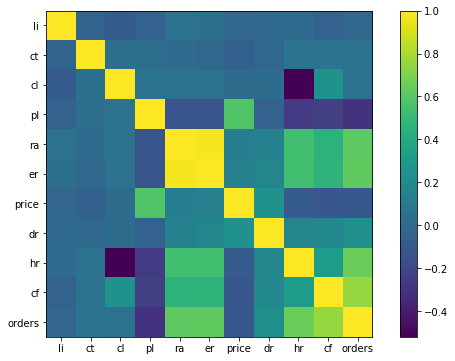

In [7]:
# 相关性分析
print ('{:*^60}'.format('Correlation Analyze:'))
short_name = ['li', 'ct', 'cl', 'pl', 'ra', 'er', 'price', 'dr', 'hr', 'cf', 'orders']
long_name = data.columns
name_dict = dict(zip(long_name, short_name))
print (data.corr().round(2).rename(index=name_dict, columns=name_dict))  # 输出所有输入特征变量以及预测变量的相关性矩阵
print (name_dict)
plt.figure(figsize=(10,6))
plt.imshow(data.corr().round(2))
plt.xticks(np.arange(11),('li', 'ct', 'cl', 'pl', 'ra', 'er', 'price', 'dr', 'hr', 'cf', 'orders'))
plt.yticks(np.arange(11),('li', 'ct', 'cl', 'pl', 'ra', 'er', 'price', 'dr', 'hr', 'cf', 'orders'))
plt.colorbar()


In [8]:
#缺失值
data['price'] = data['price'].fillna(data.price.mean())
data[:3]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416


In [9]:
#只保留促销0和1的记录
sales_data = data[data['limit_infor'].isin([0,1])]
sales_data[:3]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416


(-13.36, 6692.0]      717
(6692.0, 13364.0]      13
(26708.0, 33380.0]      1
(20036.0, 26708.0]      0
(13364.0, 20036.0]      0
Name: campaign_fee, dtype: int64

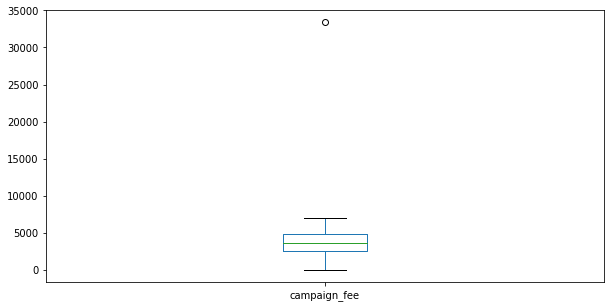

In [10]:
pd.cut(data['campaign_fee'],bins=5).value_counts()
data['campaign_fee'].plot(kind='box',figsize=(10,5))

In [18]:
sales_data.loc[:,'campaign_fee'] = sales_data['campaign_fee'].replace(33380,sales_data['campaign_fee'].mean())
sales_data.loc[633,:]

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


limit_infor           0.000000
campaign_type         4.000000
campaign_level        1.000000
product_level         1.000000
resource_amount       7.000000
email_rate            0.650000
price               142.000000
discount_rate         0.840000
hour_resouces       812.000000
campaign_fee       3696.271233
orders             4792.000000
Name: 633, dtype: float64

In [19]:
sales_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
limit_infor,730.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
campaign_type,730.0,3.00,2.01,0.00,1.00,3.00,5.00,6.00
campaign_level,730.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
product_level,730.0,1.40,0.55,1.00,1.00,1.00,2.00,3.00
resource_amount,730.0,4.95,1.84,1.00,3.00,5.00,7.00,9.00
email_rate,730.0,0.47,0.16,0.08,0.34,0.48,0.61,0.84
price,730.0,162.82,14.26,100.00,152.00,163.00,173.00,197.00
discount_rate,730.0,0.81,0.08,0.49,0.77,0.82,0.87,0.98
hour_resouces,730.0,848.51,687.03,2.00,315.25,717.00,1096.50,3410.00
campaign_fee,730.0,3655.61,1561.27,20.00,2495.00,3660.00,4783.25,6946.00


In [26]:
X = sales_data.iloc[:,:-1]
y = sales_data.iloc[:,-1]
X[:3]
y[:3]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee
0,0,6,0,1,1,0.08,140.0,0.83,93,888.0
1,0,0,0,1,1,0.10,144.0,0.75,150,836.0
2,0,1,1,1,1,0.12,149.0,0.84,86,1330.0


0    1981
1     986
2    1416
Name: orders, dtype: int64

In [28]:
model_gbr = GradientBoostingRegressor()
params = {'loss':['ls','lad','huber','quantile'],
         'min_samples_leaf':np.arange(1,6),
         'alpha':[0.1,0.3,0.6,0.9]}
model_gs = GridSearchCV(estimator=model_gbr,param_grid=params,cv=5)
model_gs.fit(X,y)
model_gs

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'], 'min_samples_leaf': array([1, 2, 3, 4, 5]), 'alpha': [0.1, 0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'], 'min_samples_leaf': array([1, 2, 3, 4, 5]), 'alpha': [0.1, 0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
model_gs.best_score_
model_gs.best_params_

0.9313814801181295

{'alpha': 0.9, 'loss': 'huber', 'min_samples_leaf': 3}

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

<Figure size 720x360 with 0 Axes>

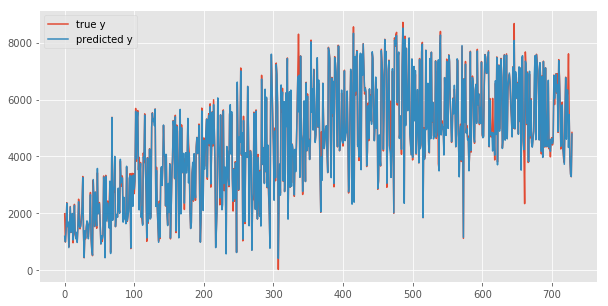

In [31]:
# 获取最佳训练模型
model_best = model_gs.best_estimator_  # 获得交叉检验模型得出的最优模型对象
model_best.fit(X, y)  # 训练最优模型
plt.style.use("ggplot")  # 应用ggplot自带样式库
plt.figure(figsize=(10,5))  # 建立画布对象
plt.plot(np.arange(X.shape[0]), y, label='true y')  # 画出原始变量的曲线
plt.plot(np.arange(X.shape[0]), model_best.predict(X), label='predicted y')  # 画出预测变量曲线
plt.legend(loc='best')  # 设置图例位置

In [37]:
np.set_printoptions(suppress=True)
model_best.feature_importances_.round(4)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.0001, 0.0002, 0.0001,
       0.1313, 0.8683])

In [32]:
# 新数据集预测
New_X = np.array([[1, 1, 0, 1, 15, 0.5, 177, 0.66, 101, 798]])  # 要预测的新数据记录
print ('{:*^60}'.format('Predicted orders:'))
print (model_best.predict(New_X).round(0))  # 打印输出预测值

*********************Predicted orders:**********************
[779.]
